In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
from bs4 import BeautifulSoup
import re
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [3]:
# User define variable and Setup
import warnings
warnings.filterwarnings("ignore")

# Set max column display is 100 row
pd.set_option('display.max_columns', 100)

In [4]:
import os
os.chdir('/content/drive/MyDrive/CBD_Robotic/Chatbot_CBD')
os.listdir()

['mini.sh',
 'train-v2.0.json',
 'db.sqlite3',
 'dev-v2.0.json',
 'slang.txt',
 'contraction_map.txt',
 'decoder_per.h5',
 'encoder_per.h5',
 'decoder.h5',
 'BERT_squa_per.pb',
 'encoder.h5',
 'Untitled0.ipynb']

In [5]:
!pip install Gutenberg

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 230 kB 9.8 MB/s 
     |████████████████████████████████| 437 kB 60.4 MB/s 
     |████████████████████████████████| 239 kB 43.2 MB/s 
     |████████████████████████████████| 237 kB 63.5 MB/s 
     |████████████████████████████████| 242 kB 57.7 MB/s 
     |████████████████████████████████| 240 kB 48.8 MB/s 
     |████████████████████████████████| 239 kB 45.0 MB/s 
     |████████████████████████████████| 326 kB 38.9 MB/s 
     |████████████████████████████████| 228 kB 53.1 MB/s 
     |████████████████████████████████| 325 kB 62.1 MB/s 
     |████████████████████████████████| 236 kB 58.4 MB/s 
     |████████████████████████████████| 563 kB 50.6 MB/s 
     |████████████████████████████████| 450 kB 58.5 MB/s 
     |████████████████████████████████| 456 kB 46.6 MB/s 
     |████████████████████████████████| 340 kB 55.1 MB/s 
     |██████████████████████████

In [6]:
from gutenberg.acquire import load_etext
from gutenberg.cleanup import strip_headers

text = strip_headers(load_etext(105)).strip()
print(text)

by Al Haines.










Persuasion


by

Jane Austen

(1818)




Chapter 1


Sir Walter Elliot, of Kellynch Hall, in Somersetshire, was a man who,
for his own amusement, never took up any book but the Baronetage; there
he found occupation for an idle hour, and consolation in a distressed
one; there his faculties were roused into admiration and respect, by
contemplating the limited remnant of the earliest patents; there any
unwelcome sensations, arising from domestic affairs changed naturally
into pity and contempt as he turned over the almost endless creations
of the last century; and there, if every other leaf were powerless, he
could read his own history with an interest which never failed.  This
was the page at which the favourite volume always opened:

           "ELLIOT OF KELLYNCH HALL.

"Walter Elliot, born March 1, 1760, married, July 15, 1784, Elizabeth,
daughter of James Stevenson, Esq. of South Park, in the county of
Gloucester, by which lady (who died 1800) he has issue Eli

In [7]:
sentences = text.split(".")
sentences

['by Al Haines',
 '\n\n\n\n\n\n\n\n\n\n\nPersuasion\n\n\nby\n\nJane Austen\n\n(1818)\n\n\n\n\nChapter 1\n\n\nSir Walter Elliot, of Kellynch Hall, in Somersetshire, was a man who,\nfor his own amusement, never took up any book but the Baronetage; there\nhe found occupation for an idle hour, and consolation in a distressed\none; there his faculties were roused into admiration and respect, by\ncontemplating the limited remnant of the earliest patents; there any\nunwelcome sensations, arising from domestic affairs changed naturally\ninto pity and contempt as he turned over the almost endless creations\nof the last century; and there, if every other leaf were powerless, he\ncould read his own history with an interest which never failed',
 '  This\nwas the page at which the favourite volume always opened:\n\n           "ELLIOT OF KELLYNCH HALL',
 '\n\n"Walter Elliot, born March 1, 1760, married, July 15, 1784, Elizabeth,\ndaughter of James Stevenson, Esq',
 ' of South Park, in the county of\

In [8]:
QnA_sentences = [sen for sen in sentences if "?" in sen]

In [9]:
QnA_sentences = [sen.split("?") for sen in QnA_sentences]
QnA_sentences

[['  He had given her some hints of it the last spring in town;\nhe had gone so far even as to say, "Can we retrench',
  '  Does it occur to\nyou that there is any one article in which we can retrench',
  '" and\nElizabeth, to do her justice, had, in the first ardour of female alarm,\nset seriously to think what could be done, and had finally proposed\nthese two branches of economy, to cut off some unnecessary charities,\nand to refrain from new furnishing the drawing-room; to which\nexpedients she afterwards added the happy thought of their taking no\npresent down to Anne, as had been the usual yearly custom'],
 ['  What will\nhe be doing, in fact, but what very many of our first families have\ndone, or ought to do',
  '  There will be nothing singular in his case; and\nit is singularity which often makes the worst part of our suffering, as\nit always does of our conduct'],
 ['  A prize indeed would Kellynch Hall be to him;\nrather the greatest prize of all, let him have taken ever so

In [10]:
qna_sen = []
question_sen = []
answer_sen = []
for i in range(len(QnA_sentences)):
  qna_sen.append(QnA_sentences[i][0])
  question_sen.append(QnA_sentences[i][0])
  qna_sen.append(QnA_sentences[i][1])
  answer_sen.append(QnA_sentences[i][1])

In [11]:
question_sen

['  He had given her some hints of it the last spring in town;\nhe had gone so far even as to say, "Can we retrench',
 '  What will\nhe be doing, in fact, but what very many of our first families have\ndone, or ought to do',
 '  A prize indeed would Kellynch Hall be to him;\nrather the greatest prize of all, let him have taken ever so many\nbefore; hey, Shepherd',
 "  'In\nthe name of heaven, who is that old fellow",
 '  What do you take his age to be',
 '  But then, is not\nit the same with many other professions, perhaps most other',
 '\n\n"And who is Admiral Croft',
 ' Bless me! what was his name',
 " Penelope, my\ndear, can you help me to the name of the gentleman who lived at\nMonkford: Mrs Croft's brother",
 '  Very odd indeed!"\n\nAfter waiting another moment--\n\n"You mean Mr Wentworth, I suppose',
 '"\n\n"Wentworth',
 '"\n\n"You have had your little boys with you',
 '  How are your neighbours at the\nGreat House',
 '"\n\n"Dear me! what can you possibly have to do',
 '"\n\n"Did

In [12]:
answer_sen

['  Does it occur to\nyou that there is any one article in which we can retrench',
 '  There will be nothing singular in his case; and\nit is singularity which often makes the worst part of our suffering, as\nit always does of our conduct',
 '"\n\nMr Shepherd laughed, as he knew he must, at this wit, and then added--\n\n"I presume to observe, Sir Walter, that, in the way of business,\ngentlemen of the navy are well to deal with',
 "' said I to a friend of mine\nwho was standing near, (Sir Basil Morley)",
 "'\n'Sixty,' said I, 'or perhaps sixty-two",
 "  Soldiers,\nin active service, are not at all better off:  and even in the quieter\nprofessions, there is a toil and a labour of the mind, if not of the\nbody, which seldom leaves a man's looks to the natural effect of time",
 '" was Sir Walter\'s cold suspicious inquiry',
 ' At this moment I cannot\nrecollect his name, though I have heard it so lately',
 '"\n\nBut Mrs Clay was talking so eagerly with Miss Elliot, that she did not\nhear 

In [13]:
# Standardizing and Spell Check
!pip install autocorrect

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 622 kB 8.3 MB/s 
  Created wheel for autocorrect: filename=autocorrect-2.6.1-py3-none-any.whl size=622382 sha256=428bbaabaa20ea13bbb7d462269c208798894de690a31ea7817dcd9ffb45147c
  Stored in directory: /root/.cache/pip/wheels/54/d4/37/8244101ad50b0f7d9bffd93ce58ed7991ee1753b290923934b
Successfully built autocorrect


In [14]:
!pip install unidecode

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 235 kB 8.6 MB/s 


In [15]:
# Importing Libraries 
import unidecode 
import pandas as pd 
import re 
import time 
import nltk 
from nltk.corpus import stopwords 
nltk.download('stopwords') 
nltk.download('punkt')
from nltk.tokenize import word_tokenize 
from nltk.stem import WordNetLemmatizer 
from autocorrect import Speller 
from bs4 import BeautifulSoup 
from nltk.corpus import stopwords 
from nltk import word_tokenize 
import string 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [16]:
def remove_newlines_tabs(sentence):
    # Replacing all the occurrences of \n,\\n,\t,\\ with a space.
    Formatted_text = sentence.replace('\\n', ' ').replace('\n', ' ').replace('\t',' ').replace('\\', ' ').replace('. com', '.com')
    return Formatted_text

In [17]:
def strip_html_tags(sentence):
    # Initiating BeautifulSoup object soup.
    soup = BeautifulSoup(sentence, "html.parser")
    # Get all the text other than html tags.
    stripped_text = soup.get_text(separator=" ")
    return stripped_text

In [18]:
def remove_links(sentence):
    # Removing all the occurrences of links that starts with https
    remove_https = re.sub(r'http\S+', '', sentence)
    # Remove all the occurrences of sentence that ends with .com
    remove_com = re.sub(r"\ [A-Za-z]*\.com", " ", remove_https)
    return remove_com

In [19]:
def remove_whitespace(sentence):
    pattern = re.compile(r'\s+') 
    Without_whitespace = re.sub(pattern, ' ', sentence)
    return Without_whitespace

In [20]:
# Code for accented characters removal
def accented_characters_removal(sentence):
    text = unidecode.unidecode(sentence)
    return text

In [21]:
def lower_casing_text(sentence):
    text = sentence.lower()
    return text

In [22]:
def expand_contractions(sentence):
  #open the file slang.txt
  file=open("contraction_map.txt","r")
  contraction_map=file.read()
  
  #separating each line present in the file
  contraction=contraction_map.split('\n')
  
  text_tokens=sentence.split()
  contraction_word=[]
  meaning=[]
  
  #store the slang words and meanings in different lists
  for line in contraction:
      temp=line.split("=")
      contraction_word.append(temp[0])
      meaning.append(temp[-1])
  
  #replace the slang word with meaning
  for i,word in enumerate(text_tokens):
      if word in contraction_word:
          idx=contraction_word.index(word)
          text_tokens[i]=meaning[idx]
          
  return( " ".join( text_tokens)) 

In [23]:
def slang_text(sentence):
  #open the file slang.txt
  file=open("slang.txt","r")
  slang=file.read()
  
  #separating each line present in the file
  slang=slang.split('\n')
  
  text_tokens=sentence.split()
  slang_word=[]
  meaning=[]
  
  #store the slang words and meanings in different lists
  for line in slang:
      temp=line.split("=")
      slang_word.append(temp[0])
      meaning.append(temp[-1])
  
  #replace the slang word with meaning
  for i,word in enumerate(text_tokens):
      if word in slang_word:
          idx=slang_word.index(word)
          text_tokens[i]=meaning[idx]
          
  return( " ".join( text_tokens)) 

In [25]:
def removing_stopwords(sentence):
    stoplist = stopwords.words('english') 
    stoplist = set(stoplist)
    text = repr(sentence)
    # Text without stopwords
    No_StopWords = [word for word in word_tokenize(text) if word.lower() not in stoplist ]  
    return( " ".join( No_StopWords)) 

In [26]:
import itertools
def spell_text(text):
  #One letter in a word should not be present more than twice in continuation
  text_spell = ''.join(''.join(s)[:2] for _, s in itertools.groupby(text))
  # print("After standardizing the tweet is:-\n{}".format(text_spell))
  
  from autocorrect import Speller
  spell = Speller(lang='en')
  #spell check
  text_spelled = spell(text_spell)
  # print("After Spell check the tweet is:-\n{}".format(text_spelled))
  return text_spelled

In [27]:
# preprocess text data
def clean_text_data(text_data):
  sentence_cleanning = remove_newlines_tabs(text_data)
  sentence_cleanning = strip_html_tags(sentence_cleanning)
  sentence_cleanning = remove_links(sentence_cleanning)
  sentence_cleanning = accented_characters_removal(sentence_cleanning)
  sentence_cleanning = lower_casing_text(sentence_cleanning)
  sentence_cleanning = expand_contractions(sentence_cleanning)
  sentence_cleanning = slang_text(sentence_cleanning)
  sentence_cleanning = re.sub("[^a-zA-Z]", " ", sentence_cleanning)
  # sentence_cleanning = removing_stopwords(sentence_cleanning)
  # sentence_cleanning = spell_text(sentence_cleanning)
  sentence_cleanning = remove_whitespace(sentence_cleanning)
  return sentence_cleanning

In [28]:
# preprocess text data
def clean_text_data_input(text_data):
  sentence_cleanning = remove_newlines_tabs(text_data)
  sentence_cleanning = strip_html_tags(sentence_cleanning)
  sentence_cleanning = remove_links(sentence_cleanning)
  sentence_cleanning = accented_characters_removal(sentence_cleanning)
  sentence_cleanning = lower_casing_text(sentence_cleanning)
  sentence_cleanning = expand_contractions(sentence_cleanning)
  sentence_cleanning = slang_text(sentence_cleanning)
  sentence_cleanning = re.sub("[^a-zA-Z]", " ", sentence_cleanning)
  # sentence_cleanning = removing_stopwords(sentence_cleanning)
  sentence_cleanning = spell_text(sentence_cleanning)
  sentence_cleanning = remove_whitespace(sentence_cleanning)
  return sentence_cleanning

In [29]:
clean_text = [clean_text_data(sentence) for sentence in sentences]
clean_text

['by al haines',
 'persuasion by jane austen chapter sir walter elliot of kellynch hall in somersetshire was a man who for his own amusement never took up any book but the baronetage there he found occupation for an idle hour and consolation in a distressed one there his faculties were roused into admiration and respect by contemplating the limited remnant of the earliest patents there any unwelcome sensations arising from domestic affairs changed naturally into pity and contempt as he turned over the almost endless creations of the last century and there if every other leaf were powerless he could read his own history with an interest which never failed',
 'this was the page at which the favourite volume always opened elliot of kellynch hall',
 ' walter elliot born march married july elizabeth daughter of james stevenson esq',
 'of south park in the county of gloucester by which lady who died he has issue elizabeth born june anne born august a still born son november mary born novembe

In [ ]:
WordSet = set()
for i in range(len(clean_text)):
  words = clean_text[i].split(" ")
  WordSet.update(list(words))

print(len(WordSet)) 

5740


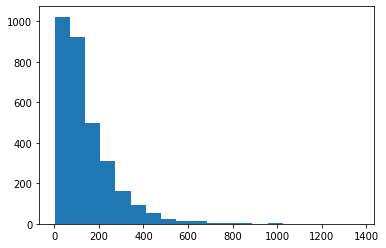

In [ ]:
len_sentences = [len(i) for i in clean_text]
plt.hist(len_sentences, bins=20)
plt.show()

In [ ]:
max_len = 0
for i in clean_text:
    if len(i) > max_len:
        max_len = len(i)
max_len

1367

In [ ]:
np.mean(len_sentences)

142.42998405103668

In [30]:
question_sen_clean = [clean_text_data(sentence) for sentence in question_sen]
question_sen_clean = ["<start> " + sentence + " <end>" for sentence in question_sen_clean]
question_sen_clean

['<start> he had given her some hints of it the last spring in town he had gone so far even as to say can we retrench <end>',
 '<start> what will he be doing in fact but what very many of our first families have done or ought to do <end>',
 '<start> a prize indeed would kellynch hall be to him rather the greatest prize of all let him have taken ever so many before hey shepherd <end>',
 '<start>  in the name of heaven who is that old fellow <end>',
 '<start> what do you take his age to be <end>',
 '<start> but then is not it the same with many other professions perhaps most other <end>',
 '<start>  and who is admiral croft <end>',
 '<start> bless me what was his name <end>',
 '<start> penelope my dear can you help me to the name of the gentleman who lived at monkford mrs croft s brother <end>',
 '<start> very odd indeed after waiting another moment you mean mr wentworth i suppose <end>',
 '<start>  wentworth <end>',
 '<start>  you have had your little boys with you <end>',
 '<start> how

In [31]:
answer_sen_clean = [clean_text_data(sentence) for sentence in answer_sen]
answer_sen_clean = ["<start> " + sentence + " <end>" for sentence in answer_sen_clean]
answer_sen_clean

['<start> does it occur to you that there is any one article in which we can retrench <end>',
 '<start> there will be nothing singular in his case and it is singularity which often makes the worst part of our suffering as it always does of our conduct <end>',
 '<start>  mr shepherd laughed as he knew he must at this wit and then added i presume to observe sir walter that in the way of business gentlemen of the navy are well to deal with <end>',
 '<start>  said i to a friend of mine who was standing near sir basil morley  <end>',
 '<start>  sixty said i or perhaps sixty two <end>',
 '<start> soldiers in active service are not at all better off and even in the quieter professions there is a toil and a labour of the mind if not of the body which seldom leaves a man s looks to the natural effect of time <end>',
 '<start>  was sir walter s cold suspicious inquiry <end>',
 '<start> at this moment i cannot recollect his name though i have heard it so lately <end>',
 '<start>  but mrs clay was

In [52]:
class Language():
    def __init__(self, lines):
        self.lines = lines
        self.word2id = {}
        self.id2word = {}
        self.vocab = set()
        self.max_len = 0
        self.min_len = 0
        self.vocab_size = 0
        self.init_language_params()

    def init_language_params(self):
        for line in self.lines:
            self.vocab.update(line.split(" "))
        self.word2id['<pad>'] = 0
        for id, word in enumerate(self.vocab):
            self.word2id[word] = id + 1
        for word, id in self.word2id.items():
            self.id2word[id] = word
        self.max_len = max([len(line.split(" ")) for line in self.lines])
        self.min_len = min([len(line.split(" ")) for line in self.lines])
        self.vocab_size = len(self.vocab) + 1
            
    def sentence_to_vector(self, sent):
        return np.array([self.word2id[word] for word in sent.split(" ")])
            
    def vector_to_sentence(self, vector):
        return " ".join([self.id2word[id] for id in vector])

In [ ]:
inp_lang = Language(question_sen_clean)
print(inp_lang.max_len, inp_lang.min_len)

151 4


In [ ]:
inp_lang = Language(question_sen_clean)
tar_lang = Language(answer_sen_clean)
print(inp_lang.max_len, inp_lang.min_len)
print(tar_lang.max_len, tar_lang.min_len)

inp_vector = [inp_lang.sentence_to_vector(line) for line in inp_lang.lines]
tar_vector = [tar_lang.sentence_to_vector(line) for line in tar_lang.lines]

inp_tensor = tf.keras.preprocessing.sequence.pad_sequences(inp_vector, inp_lang.max_len, padding='post')
tar_tensor = tf.keras.preprocessing.sequence.pad_sequences(tar_vector, tar_lang.max_len, padding='post')
print(inp_tensor.shape, tar_tensor.shape)

151 4
132 3
(176, 151) (176, 132)


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(inp_tensor, tar_tensor, test_size=0.1)

BATCH_SIZE = 8
BUFFER_SIZE = x_train.shape[0]
N_BATCH = BUFFER_SIZE//BATCH_SIZE
hidden_unit = 1024
embedding_size = 256
print(BUFFER_SIZE)


dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
dataset = dataset.batch(BATCH_SIZE)

tmp_x, tmp_y = next(iter(dataset))
print(tmp_x.shape)
print(tmp_y.shape)

158
(8, 151)
(8, 132)


In [53]:
class Encode(tf.keras.Model):
    def __init__(self, embedding_size, vocab_size, hidden_units):
        super(Encode, self).__init__()
        self.Embedding = tf.keras.layers.Embedding(vocab_size,embedding_size)
        self.GRU = tf.keras.layers.GRU(
            hidden_units,
            return_sequences=True,
            return_state=True,
            recurrent_initializer='glorot_uniform')
        self.hidden_units = hidden_units
        
    def call(self, x, hidden_state):
        try:
            x = self.Embedding(x)
        except:
            print(x, print(inp_lang.vocab_size))          
        outputs, last_state = self.GRU(x, hidden_state)
        return outputs, last_state
    
    def init_hidden_state(self, batch_size):
        return tf.zeros([batch_size, self.hidden_units])

In [ ]:
encoder = Encode(embedding_size, inp_lang.vocab_size, hidden_unit)
hidden_state = encoder.init_hidden_state(BATCH_SIZE)
tmp_outputs, last_state = encoder(tmp_x, hidden_state)
print(tmp_outputs.shape)
print(last_state.shape)

(8, 151, 1024)
(8, 1024)


In [54]:
class Attention(tf.keras.Model):
    def __init__(self, hidden_units):
        super(Attention, self).__init__()
        self.W_out_encode = tf.keras.layers.Dense(hidden_unit)
        self.W_state = tf.keras.layers.Dense(hidden_unit)
        self.V = tf.keras.layers.Dense(1)
        
    def call(self, encode_outs, pre_state):
        pre_state = tf.expand_dims(pre_state, axis=1)
        pre_state = self.W_state(pre_state)
        encode_outs = self.W_out_encode(encode_outs)
        score = self.V(
            tf.nn.tanh(
                pre_state + encode_outs)
        )
        score = tf.nn.softmax(score, axis=1)
        context_vector = score*encode_outs
        context_vector = tf.reduce_sum(context_vector, axis=1)
        return context_vector, score
    

In [ ]:
attention = Attention(hidden_unit)
context_vector, attention_weight = attention(tmp_outputs, last_state)
print(context_vector.shape, attention_weight.shape)

(8, 1024) (8, 151, 1)


In [55]:
class Decode(tf.keras.Model):
    def __init__(self, vocab_size, embedding_size, hidden_units):
        super(Decode, self).__init__()
        self.hidden_units = hidden_units
        self.Embedding = tf.keras.layers.Embedding(vocab_size,embedding_size)
        self.Attention = Attention(hidden_units)
        self.GRU = tf.keras.layers.GRU(
            hidden_units,
            return_sequences=True,
            return_state=True,
            recurrent_initializer='glorot_uniform'
        )
        self.Fc = tf.keras.layers.Dense(vocab_size)
            
    def call(self, x, encode_outs, pre_state):
        x = tf.expand_dims(x, axis=1)
        try:
            x = self.Embedding(x)
        except:
            print(x, print(tar_lang.vocab_size))          
        context_vector, attention_weight = self.Attention(encode_outs, pre_state)
        context_vector = tf.expand_dims(context_vector, axis=1)
        gru_inp = tf.concat([x, context_vector], axis=-1)
        out_gru, state = self.GRU(gru_inp)
        out_gru = tf.reshape(out_gru, (-1, out_gru.shape[2]))
        return self.Fc(out_gru), state
    
    


In [ ]:
decode = Decode(tar_lang.vocab_size, embedding_size, hidden_unit)
print(last_state.shape, tmp_outputs.shape, tmp_y[:, 0].shape)
decode_out, state = decode(tmp_y[:, 0], tmp_outputs, last_state)

(8, 1024) (8, 151, 1024) (8,)


In [56]:
def loss_function(real, pred):
    mask = 1 - np.equal(real, 0)
    loss_ = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=real, logits=pred) * mask
    return tf.reduce_mean(loss_)

In [ ]:
EPOCHS = 20
# optimizer = tf.train.AdamOptimizer()
optimizer = tf.optimizers.Adam()
encoder = Encode(embedding_size, vocab_size=inp_lang.vocab_size, hidden_units=hidden_unit)
decoder = Decode(vocab_size=tar_lang.vocab_size, embedding_size=embedding_size, hidden_units=hidden_unit)

In [ ]:
for epoch in range(EPOCHS):
    total_loss = 0
    for batch_id, (x, y) in enumerate(dataset.take(N_BATCH)):
        loss = 0
        with tf.GradientTape() as tape:
            first_state = encoder.init_hidden_state(batch_size=BATCH_SIZE)
            encode_outs, last_state = encoder(x, first_state)
            decode_state = last_state
            decode_input = [tar_lang.word2id["<start>"]]*BATCH_SIZE
            
            for i in range(1, y.shape[1]):
                decode_out, decode_state = decoder(decode_input, encode_outs, decode_state)
                loss += loss_function(y[:, i], decode_out)
                decode_input = y[:, i]
                
            train_vars = encoder.trainable_variables + decoder.trainable_variables
            grads = tape.gradient(loss, train_vars)
            optimizer.apply_gradients(zip(grads, train_vars))
        total_loss += loss
    print(total_loss.numpy())

2221.1672
1998.7714
1933.7643
1868.8967
1782.6847
1674.6926
1543.9371
1414.0913
1297.0215
1196.5248
1130.9438
1043.6952
963.5804
920.0655
864.6197
822.7246
809.34534
793.0421
763.23883
775.37103


In [ ]:
# save trained weights
# encoder.save_weights("encoder_per.h5")
# decoder.save_weights("decoder_per.h5")

In [ ]:
# # from keras.models import load_weights
# encoder.load_weights("encoder_per.h5")
# decoder.load_weights("decoder_per.h5")

In [ ]:
def preprocess_input(user_input):
  question = clean_text_data(user_input)
  question = str("<start> " + question + " <end>")
  inp_lang = Language(question_sen_clean)
  inp_vector = inp_lang.sentence_to_vector(question)
  inp_tensor = tf.keras.preprocessing.sequence.pad_sequences([inp_vector], inp_lang.max_len, padding='post')
  return tf.convert_to_tensor(inp_tensor, dtype=tf.int32)

In [ ]:
def process(inputs):
    result = ''
    hidden = encoder.init_hidden_state(batch_size=1)
    enc_out, enc_hidden = encoder(inputs, hidden)
    dec_hidden = enc_hidden
    print(enc_out.shape, dec_hidden.shape)
    
    dec_input = [tar_lang.word2id['<start>']]
    for t in range(tar_lang.max_len):
        predictions, dec_hidden = decoder(dec_input, enc_out, dec_hidden)
        predicted_id = tf.argmax(predictions[0]).numpy()
        result += tar_lang.id2word[predicted_id] + ' '
        dec_input = [predicted_id]
    return result
  
for inp, tar in dataset.take(N_BATCH):
    print(process(inp[1:2,:]))
    break

(1, 151, 1024) (1, 1024)
 said anne had not be done the answer and it was not be done the answer and it was not be done the answer and it was not be done the answer and it was not be done the answer and it was not be done the answer and it was not be done the answer and it was not be done the answer and it was not be done the answer and it was not be done the answer and it was not be done the answer and it was not be done the answer and it was not be done the answer and it was not be done the answer and it was not be done the answer and it was not be done the answer and it was 


In [ ]:
print("Persuasion: I will try to respond to you reasonably. If you want to exit, type bye.")

# The following loop will execute each time the user enters input
while True:
    try:
        user_input = input("User: ")
        user_request = preprocess_input(user_request)
        persuation = process(user_request)
        print(f"Persuasion: {clean_text_data(persuation)}")
        if user_input.lower() == "bye":
          break
    except KeyError:
      print("Persuation: Sorry, T don't have information, we will update later!")
    # Press ctrl-c or ctrl-d on the keyboard to exit
    except (KeyboardInterrupt, EOFError, SystemExit):
        break

Persuasion: I will try to respond to you reasonably. If you want to exit, type bye.
User: Hello
Persuation: Sorry, T don't have information, we will update later!
User: How are you?
Persuation: Sorry, T don't have information, we will update later!
User: Of course. Life is mysterious.
Persuation: Sorry, T don't have information, we will update later!
User: bye
Persuation: Sorry, T don't have information, we will update later!
User: 
Persuation: Sorry, T don't have information, we will update later!


2. BERT for SQUADs 

In [ ]:
texts = []
question_sen = []
answer_sen = []
for i in range(len(sentences)):
  if "?" in sentences[i]:
    texts.append(clean_text_data(sentences[i-1]))
    QnA_sentences = sentences[i].split("?")
    question_sen.append(clean_text_data(QnA_sentences[0]))
    answer = {'text': clean_text_data(QnA_sentences[1]), 'answer_start': i}
    answer_sen.append(answer)

In [ ]:
print("Passage: ",texts[0])  
print("Question: ",question_sen[0])
print("Answer: ",answer_sen[0])

Passage:  it had not been possible for him to spend less he had done nothing but what sir walter elliot was imperiously called on to do but blameless as he was he was not only growing dreadfully in debt but was hearing of it so often that it became vain to attempt concealing it longer even partially from his daughter
Question:  he had given her some hints of it the last spring in town he had gone so far even as to say can we retrench
Answer:  {'text': 'does it occur to you that there is any one article in which we can retrench', 'answer_start': 66}


In [ ]:
text_train, text_val, question_train, question_val, answer_train, answer_val = train_test_split(texts, question_sen, answer_sen, test_size=0.1)
print(len(text_train))
print(len(question_train))
print(len(answer_train))

158
158
158


In [ ]:
print(len(text_val))
print(len(question_val))
print(len(answer_val))

18
18
18


Because Bert model needs both start and end position characters of the answer, I have to find it and store it for later. Sometimes, I notice that SQuAD anwers "eat" one or two characters from the real answer in the passage. For example, (as a colleague said in Piazza) for the word "sixth" in passage, SQuAD give the answer of "six". So in these cases I select to handle this problem by "cutting" the passage by 1 or 2 characters to be the same as the given answer. This strategy is because BERT works with ***tokens*** of a specific format so I needed to process the squad dataset to keep up with the input that BERT is waiting for. 

For train data

In [ ]:
for answer, text in zip(answer_train, text_train):
    real_answer = answer['text']
    start_idx = answer['answer_start']
    # Get the real end index
    end_idx = start_idx + len(real_answer)
    answer['answer_end'] = end_idx

for validate data

In [ ]:
for answer, text in zip(answer_val, text_val):
    real_answer = answer['text']
    start_idx = answer['answer_start']
    # Get the real end index
    end_idx = start_idx + len(real_answer)
    answer['answer_end'] = end_idx

Tokenize texts and question

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.4 MB 5.2 MB/s 
     |████████████████████████████████| 596 kB 67.1 MB/s 
     |████████████████████████████████| 6.6 MB 52.4 MB/s 
     |████████████████████████████████| 101 kB 14.9 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
from transformers import AutoTokenizer,AdamW,BertForQuestionAnswering
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

train_encodings = tokenizer(text_train, question_train, truncation=True, padding=True)
val_encodings = tokenizer(text_val, question_val, truncation=True, padding=True)

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

In [ ]:
def add_token_positions(encodings, answers):
  start_positions = []
  end_positions = []

  count = 0

  for i in range(len(answers)):
    start_positions.append(encodings.char_to_token(i, answers[i]['answer_start']))
    end_positions.append(encodings.char_to_token(i, answers[i]['answer_end']))

    # if start position is None, the answer passage has been truncated
    if start_positions[-1] is None:
      start_positions[-1] = tokenizer.model_max_length
      
    # if end position is None, the 'char_to_token' function points to the space after the correct token, so add - 1
    if end_positions[-1] is None:
      end_positions[-1] = encodings.char_to_token(i, answers[i]['answer_end'] - 1)
      # if end position is still None the answer passage has been truncated
      if end_positions[-1] is None:
        count += 1
        end_positions[-1] = tokenizer.model_max_length

  print(count)

  # Update the data in dictionary
  encodings.update({'start_positions': start_positions, 'end_positions': end_positions})

add_token_positions(train_encodings, answer_train)
add_token_positions(val_encodings, answer_val)

151
18


In [ ]:
import torch
from torch.utils.data import DataLoader
import time

In [ ]:
class SquadDataset(torch.utils.data.Dataset):
    def __init__(self, encodings):
        self.encodings = encodings

    def __getitem__(self, idx):
        return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}

    def __len__(self):
        return len(self.encodings.input_ids)

In [ ]:
train_dataset = SquadDataset(train_encodings)
val_dataset = SquadDataset(val_encodings)

In [ ]:
train_loader = DataLoader(train_dataset, batch_size=1, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=1, shuffle=True)

In [ ]:
device = torch.device('cuda:0' if torch.cuda.is_available()
                      else 'cpu')

In [ ]:
model = BertForQuestionAnswering.from_pretrained('bert-base-uncased').to(device)

optim = AdamW(model.parameters(), lr=5e-5)
# optim = AdamW(model.parameters(), lr=3e-5)
# optim = AdamW(model.parameters(), lr=2e-5)

# epochs = 2
epochs = 10
# epochs = 4

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForQuestionAnswering: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForQuestionAnswering were not initialized from the model checkpoint at bert-base-uncased a

In [ ]:
whole_train_eval_time = time.time()

train_losses = []
val_losses = []

print_every = 1000

for epoch in range(epochs):
  epoch_time = time.time()

  # Set model in train mode
  model.train()
    
  loss_of_epoch = 0

  print("############Train############")

  for batch_idx,batch in enumerate(train_loader): 
    
    optim.zero_grad()

    input_ids = batch['input_ids'].to(device)
    attention_mask = batch['attention_mask'].to(device)
    start_positions = batch['start_positions'].to(device)
    end_positions = batch['end_positions'].to(device)
    
    outputs = model(input_ids, attention_mask=attention_mask, start_positions=start_positions, end_positions=end_positions)
    loss = outputs[0]
    # do a backwards pass 
    loss.backward()
    # update the weights
    optim.step()
    # Find the total loss
    loss_of_epoch += loss.item()

    if (batch_idx+1) % print_every == 0:
      print("Batch {:} / {:}".format(batch_idx+1,len(train_loader)),"\nLoss:", round(loss.item(),1),"\n")

  loss_of_epoch /= len(train_loader)
  train_losses.append(loss_of_epoch)

  ##########Evaluation##################

  # Set model in evaluation mode
  model.eval()

  print("############Evaluate############")

  loss_of_epoch = 0

  for batch_idx,batch in enumerate(val_loader):
    
    with torch.no_grad():

      input_ids = batch['input_ids'].to(device)
      attention_mask = batch['attention_mask'].to(device)
      start_positions = batch['start_positions'].to(device)
      end_positions = batch['end_positions'].to(device)
      
      outputs = model(input_ids, attention_mask=attention_mask, start_positions=start_positions, end_positions=end_positions)
      loss = outputs[0]
      # Find the total loss
      loss_of_epoch += loss.item()

    if (batch_idx+1) % print_every == 0:
       print("Batch {:} / {:}".format(batch_idx+1,len(val_loader)),"\nLoss:", round(loss.item(),1),"\n")

  loss_of_epoch /= len(val_loader)
  val_losses.append(loss_of_epoch)

  # Print each epoch's time and train/val loss 
  print("\n-------Epoch ", epoch+1,
        "-------"
        "\nTraining Loss:", train_losses[-1],
        "\nValidation Loss:", val_losses[-1],
        "\nTime: ",(time.time() - epoch_time),
        "\n-----------------------",
        "\n\n")

print("Total training and evaluation time: ", (time.time() - whole_train_eval_time))
# Save model
torch.save(model,"BERT_squa_per.pb")

In [ ]:
import matplotlib.pyplot as plt 

fig,ax = plt.subplots(1,1,figsize=(15,10))

ax.set_title("Train and Validation Losses",size=20)
ax.set_ylabel('Loss', fontsize = 20) 
ax.set_xlabel('Epochs', fontsize = 25) 
_=ax.plot(train_losses)
_=ax.plot(val_losses)
_=ax.legend(('Train','Val'),loc='upper right')

In [ ]:
outputs = model(input_ids, attention_mask=attention_mask, start_positions=start_positions, end_positions=end_positions)

In [ ]:
print("Persuasion: I will try to respond to you reasonably. If you want to exit, type bye.")

# The following loop will execute each time the user enters input
while True:
    try:
        user_input = input("User: ")
        bot_response = qna_bot.get_response(user_input)
        print("Persuasion: ", bot_response)
        if user_input.lower() == "bye":
          break

    # Press ctrl-c or ctrl-d on the keyboard to exit
    except (KeyboardInterrupt, EOFError, SystemExit):
        break

3. Chatterbot

In [32]:
qna_sen_clean = [clean_text_data(sentence) for sentence in qna_sen]
qna_sen_clean

['he had given her some hints of it the last spring in town he had gone so far even as to say can we retrench',
 'does it occur to you that there is any one article in which we can retrench',
 'what will he be doing in fact but what very many of our first families have done or ought to do',
 'there will be nothing singular in his case and it is singularity which often makes the worst part of our suffering as it always does of our conduct',
 'a prize indeed would kellynch hall be to him rather the greatest prize of all let him have taken ever so many before hey shepherd',
 ' mr shepherd laughed as he knew he must at this wit and then added i presume to observe sir walter that in the way of business gentlemen of the navy are well to deal with',
 ' in the name of heaven who is that old fellow',
 ' said i to a friend of mine who was standing near sir basil morley ',
 'what do you take his age to be',
 ' sixty said i or perhaps sixty two',
 'but then is not it the same with many other profe

In [33]:
!pip install spacy==2.3.5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 10.4 MB 6.6 MB/s 
     |████████████████████████████████| 184 kB 74.0 MB/s 
     |████████████████████████████████| 1.0 MB 68.6 MB/s 
  Attempting uninstall: srsly
    Found existing installation: srsly 2.4.3
    Uninstalling srsly-2.4.3:
      Successfully uninstalled srsly-2.4.3
  Attempting uninstall: catalogue
    Found existing installation: catalogue 2.0.7
    Uninstalling catalogue-2.0.7:
      Successfully uninstalled catalogue-2.0.7
  Attempting uninstall: thinc
    Found existing installation: thinc 8.0.17
    Uninstalling thinc-8.0.17:
      Successfully uninstalled thinc-8.0.17
  Attempting uninstall: spacy
    Found existing installation: spacy 3.3.1
    Uninstalling spacy-3.3.1:
      Successfully uninstalled spacy-3.3.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This beha

In [34]:
!pip install chatterbot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 63 kB 2.0 MB/s 
     |████████████████████████████████| 1.3 MB 17.1 MB/s 
  Attempting uninstall: sqlalchemy
    Found existing installation: SQLAlchemy 1.4.37
    Uninstalling SQLAlchemy-1.4.37:
      Successfully uninstalled SQLAlchemy-1.4.37


In [35]:
!pip install chatterbot --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [36]:
!python -m spacy download en_core_web_sm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 12.0 MB 7.6 MB/s 
  Created wheel for en-core-web-sm: filename=en_core_web_sm-2.3.1-py3-none-any.whl size=12047105 sha256=97d4a933cd042c2ffd1041111ea30e5e0ca52ef5ad05cd52559f29825ba6cb40
  Stored in directory: /tmp/pip-ephem-wheel-cache-3_yk8g15/wheels/b7/0d/f0/7ecae8427c515065d75410989e15e5785dd3975fe06e795cd9
Successfully built en-core-web-sm
  Attempting uninstall: en-core-web-sm
    Found existing installation: en-core-web-sm 3.3.0
    Uninstalling en-core-web-sm-3.3.0:
      Successfully uninstalled en-core-web-sm-3.3.0
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [37]:
from chatterbot import ChatBot
from chatterbot.trainers import ListTrainer


# adding language for compatibility with spacy 3.0
class ENGSM:
    ISO_639_1 = 'en_core_web_sm'


# Create a new instance of a ChatBot
bot = ChatBot(
    "ChatBotDemo",
    tagger_language=ENGSM     # <-- pass this new language here
)

trainer = ListTrainer(bot)

trainer.train(qna_sen_clean)

List Trainer: [####################] 100%


In [39]:
print("Persuasion: I will try to respond to you reasonably. If you want to exit, type bye.")

# The following loop will execute each time the user enters input
while True:
    try:
        user_input = input("User: ")
        user_input = clean_text_data_input(user_input)
        bot_response = bot.get_response(user_input)
        print("Persuasion: ", bot_response)
        if user_input.lower() == "bye":
          break

    # Press ctrl-c or ctrl-d on the keyboard to exit
    except (KeyboardInterrupt, EOFError, SystemExit):
        break

Persuasion: I will try to respond to you reasonably. If you want to exit, type bye.
User: Hello
Persuasion:  captain harville smiled as much as to say do you claim that for your sex
User: How are you?
Persuasion:  she thought of her father of lady russell
User: Of course. Life is mysterious.
Persuasion:  could ever ascertained mind truly cleansed
User: Me too. Speaking with you is like a therapy.
Persuasion:  smallest objection account replied anne
User: bye
Persuasion:  we had better not talk about it my dear replied mrs croft pleasantly for if miss elliot were to hear how soon we came to an understanding she would never be persuaded that we could be happy together


4. The Stanford Question Answering Dataset

4.1 seq2seq

In [47]:
import json
def get_answers_n_question(data_json_file):
  f = open(data_json_file)
  data = json.load(f)
  f.close()
  answers = []
  question = []
  for i in range(len(data["data"])):
    paragraphs = data["data"][i]["paragraphs"]
    for j in range(len(paragraphs)):
      qas = paragraphs[j]["qas"]
      for k in range(len(qas)):
        question.append(qas[k]["question"])
        if not list(qas[k]['answers']):
          answers.append('unknown')
          continue
        answers.append(qas[k]['answers'][0]['text'])
  return answers, question

In [48]:
answers_train, question_train = get_answers_n_question('train-v2.0.json')
answers_dev, question_dev = get_answers_n_question('dev-v2.0.json')

In [49]:
question_sen_clean = [clean_text_data(sentence) for sentence in question_train]
question_sen_clean = ["<start> " + sentence + " <end>" for sentence in question_sen_clean]
# open file in write mode
with open(r'question_sen_clean.txt', 'w') as fp:
    for item in question_sen_clean:
        # write each item on a new line
        fp.write("%s\n" % item)
    print('Done')

Done


In [50]:
answer_sen_clean = [clean_text_data(sentence) for sentence in answers_train]
answer_sen_clean = ["<start> " + sentence + " <end>" for sentence in answer_sen_clean]
# open file in write mode
with open(r'answer_sen_clean.txt', 'w') as fp:
    for item in answer_sen_clean:
        # write each item on a new line
        fp.write("%s\n" % item)
    print('Done')

Done


In [57]:
inp_lang = Language(question_sen_clean)
print(inp_lang.max_len, inp_lang.min_len)

43 3


In [58]:
inp_lang = Language(question_sen_clean)
tar_lang = Language(answer_sen_clean)
print(inp_lang.max_len, inp_lang.min_len)
print(tar_lang.max_len, tar_lang.min_len)

inp_vector = [inp_lang.sentence_to_vector(line) for line in inp_lang.lines]
tar_vector = [tar_lang.sentence_to_vector(line) for line in tar_lang.lines]

inp_tensor = tf.keras.preprocessing.sequence.pad_sequences(inp_vector, inp_lang.max_len, padding='post')
tar_tensor = tf.keras.preprocessing.sequence.pad_sequences(tar_vector, tar_lang.max_len, padding='post')
print(inp_tensor.shape, tar_tensor.shape)

43 3
45 3
(130319, 43) (130319, 45)


In [59]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(inp_tensor, tar_tensor, test_size=0.1)

BATCH_SIZE = 32
BUFFER_SIZE = x_train.shape[0]
N_BATCH = BUFFER_SIZE//BATCH_SIZE
hidden_unit = 1024
embedding_size = 256
print(BUFFER_SIZE)


dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
dataset = dataset.batch(BATCH_SIZE)

tmp_x, tmp_y = next(iter(dataset))
print(tmp_x.shape)
print(tmp_y.shape)

117287
(32, 43)
(32, 45)


In [60]:
encoder = Encode(embedding_size, inp_lang.vocab_size, hidden_unit)
hidden_state = encoder.init_hidden_state(BATCH_SIZE)
tmp_outputs, last_state = encoder(tmp_x, hidden_state)
print(tmp_outputs.shape)
print(last_state.shape)

(32, 43, 1024)
(32, 1024)


In [61]:
attention = Attention(hidden_unit)
context_vector, attention_weight = attention(tmp_outputs, last_state)
print(context_vector.shape, attention_weight.shape)

(32, 1024) (32, 43, 1)


In [62]:
decode = Decode(tar_lang.vocab_size, embedding_size, hidden_unit)
print(last_state.shape, tmp_outputs.shape, tmp_y[:, 0].shape)
decode_out, state = decode(tmp_y[:, 0], tmp_outputs, last_state)

(32, 1024) (32, 43, 1024) (32,)


In [63]:
EPOCHS = 10
# optimizer = tf.train.AdamOptimizer()
optimizer = tf.optimizers.Adam()
encoder = Encode(embedding_size, vocab_size=inp_lang.vocab_size, hidden_units=hidden_unit)
decoder = Decode(vocab_size=tar_lang.vocab_size, embedding_size=embedding_size, hidden_units=hidden_unit)

In [ ]:
for epoch in range(EPOCHS):
    total_loss = 0
    for batch_id, (x, y) in enumerate(dataset.take(N_BATCH)):
        loss = 0
        with tf.GradientTape() as tape:
            first_state = encoder.init_hidden_state(batch_size=BATCH_SIZE)
            encode_outs, last_state = encoder(x, first_state)
            decode_state = last_state
            decode_input = [tar_lang.word2id["<start>"]]*BATCH_SIZE
            
            for i in range(1, y.shape[1]):
                decode_out, decode_state = decoder(decode_input, encode_outs, decode_state)
                loss += loss_function(y[:, i], decode_out)
                decode_input = y[:, i]
                
            train_vars = encoder.trainable_variables + decoder.trainable_variables
            grads = tape.gradient(loss, train_vars)
            optimizer.apply_gradients(zip(grads, train_vars))
        total_loss += loss
    print(total_loss.numpy())

In [ ]:
# # save trained weights
# encoder.save_weights("encoder.h5")
# decoder.save_weights("decoder.h5")

In [ ]:
# encoder.load_weights("encoder.h5")
# decoder.load_weights("decoder.h5")

In [ ]:
print("Persuasion: I will try to respond to you reasonably. If you want to exit, type bye.")

# The following loop will execute each time the user enters input
while True:
    try:
        user_input = input("User: ")
        user_request = preprocess_input(user_request)
        persuation = process(user_request)
        print(f"Persuasion: {clean_text_data(persuation)}")
        if user_input.lower() == "bye":
          break
    except KeyError:
      print("Persuation: Sorry, T don't have information, we will update later!")
    # Press ctrl-c or ctrl-d on the keyboard to exit
    except (KeyboardInterrupt, EOFError, SystemExit):
        break

4.2 BERT

In [ ]:
import json
def get_answers_n_question(data_json_file):
  f = open(data_json_file)
  data = json.load(f)
  f.close()
  contexts = []
  answers = []
  question = []
  for i in range(len(data["data"])):
    paragraphs = data["data"][i]["paragraphs"]
    for j in range(len(paragraphs)):
      contexts.append(clean_text_data(paragraphs[j]['context']))
      qas = paragraphs[j]["qas"]
      question.append(clean_text_data(qas[0]["question"]))
      if not list(qas[0]['answers']):
        answers.append('unknown')
        continue
      answers.append(qas[0]['answers'][0])
  return contexts, answers, question

In [ ]:
contexts_train, answers_train, question_train = get_answers_n_question('train-v2.0.json')
contexts_dev, answers_dev, question_dev = get_answers_n_question('dev-v2.0.json')

In [ ]:
print(len(contexts_train))
print(len(question_train))
print(len(answers_train))

19035
19035
19035


In [ ]:
contexts_train[0]

'beyonc giselle knowles carter bi j nse bee yon say born september american singer songwriter record producer actress born raised houston texas performed various singing dancing competition child rose fame late lead singer r b girl group destiny child managed father mathew knowles group became one world best selling girl group time hiatus saw release beyonc debut album dangerously love established solo artist worldwide earned five grammy award featured billboard hot number one single crazy love baby boy'

In [ ]:
question_train[0]

'beyonce start becoming popular'

In [ ]:
answers_train[1247]

{'answer_end': 7, 'answer_start': 0, 'text': 'unknown'}

In [ ]:
for i in range(len(answers_train)):
  if list(answers_train[i]):
    continue
  answers_train[i]["text"] = clean_text_data(answers_train[i]["text"])

In [ ]:
for i in range(len(answers_dev)):
  if list(answers_dev[i]):
    continue
  answers_dev[i]["text"] = clean_text_data(answers_dev[i]["text"])

In [ ]:
print(len(contexts_dev))
print(len(question_dev))
print(len(answers_dev))

1204
1204
1204


In [ ]:
for i in range(len(answers_train)):
  if list(answers_train[i]):
    answers_train[i] = {'answer_start': 0,
      'answer_end': 0,
      'text': "unknown"}
    continue
  start_idx = answers_train[i]['answer_start']
  end_idx = start_idx + len(answers_train[i]["text"])
  answers_train[i]['answer_end'] = end_idx

In [ ]:
for i in range(len(answers_dev)):
  if list(answers_dev[i]):
    answers_dev[i] = {'answer_start': 0,
      'answer_end': 0,
      'text': "unknown"}
    continue
  start_idx = answers_dev[i]['answer_start']
  end_idx = start_idx + len(answers_dev[i]["text"])
  answers_dev[i]['answer_end'] = end_idx

In [ ]:
def storing_clean_data(data_name):
  # open file in write mode
  with open(f'{data_name}.txt', 'w') as fp:
    for item in data_name:
        # write each item on a new line
        fp.write("%s\n" % item)
    print('Done')

In [ ]:
list_data_file = ['contexts_train', 'question_train', 'answers_train', 'contexts_dev', 'question_dev', 'answers_dev']
for data_file in list_data_file:
  storing_clean_data(data_file)
print("Storing complete!")

In [ ]:
from transformers import AutoTokenizer,AdamW,BertForQuestionAnswering
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

train_encodings = tokenizer(contexts_train, question_train, truncation=True, padding=True)
val_encodings = tokenizer(contexts_dev, question_dev, truncation=True, padding=True)

In [ ]:
def add_token_positions(encodings, answers):
  start_positions = []
  end_positions = []

  count = 0

  for i in range(len(answers)):
    start_positions.append(encodings.char_to_token(i, answers[i]['answer_start']))
    end_positions.append(encodings.char_to_token(i, answers[i]['answer_end']))

    # if start position is None, the answer passage has been truncated
    if start_positions[-1] is None:
      start_positions[-1] = tokenizer.model_max_length
      
    # if end position is None, the 'char_to_token' function points to the space after the correct token, so add - 1
    if end_positions[-1] is None:
      end_positions[-1] = encodings.char_to_token(i, answers[i]['answer_end'] - 1)
      # if end position is still None the answer passage has been truncated
      if end_positions[-1] is None:
        count += 1
        end_positions[-1] = tokenizer.model_max_length

  print(count)

  # Update the data in dictionary
  encodings.update({'start_positions': start_positions, 'end_positions': end_positions})

add_token_positions(train_encodings, answers_train)
add_token_positions(val_encodings, answers_dev)

0
0


In [ ]:
train_dataset = SquadDataset(train_encodings)
val_dataset = SquadDataset(val_encodings)

In [ ]:
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=8, shuffle=True)

In [ ]:
device = torch.device('cuda:0' if torch.cuda.is_available()
                      else 'cpu')

In [ ]:
model = BertForQuestionAnswering.from_pretrained('bert-base-uncased').to(device)

optim = AdamW(model.parameters(), lr=5e-5)
# optim = AdamW(model.parameters(), lr=3e-5)
# optim = AdamW(model.parameters(), lr=2e-5)

# epochs = 2
epochs = 3
# epochs = 4

Downloading:   0%|          | 0.00/420M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForQuestionAnswering: ['cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForQuestionAnswering were not initialized from the model checkpoint at bert-base-uncased a

In [ ]:
whole_train_eval_time = time.time()

train_losses = []
val_losses = []

print_every = 1000

for epoch in range(epochs):
  epoch_time = time.time()

  # Set model in train mode
  model.train()
    
  loss_of_epoch = 0

  print("############Train############")

  for batch_idx,batch in enumerate(train_loader): 
    
    optim.zero_grad()

    input_ids = batch['input_ids'].to(device)
    attention_mask = batch['attention_mask'].to(device)
    start_positions = batch['start_positions'].to(device)
    end_positions = batch['end_positions'].to(device)
    
    outputs = model(input_ids, attention_mask=attention_mask, start_positions=start_positions, end_positions=end_positions)
    loss = outputs[0]
    # do a backwards pass 
    loss.backward()
    # update the weights
    optim.step()
    # Find the total loss
    loss_of_epoch += loss.item()

    if (batch_idx+1) % print_every == 0:
      print("Batch {:} / {:}".format(batch_idx+1,len(train_loader)),"\nLoss:", round(loss.item(),1),"\n")

  loss_of_epoch /= len(train_loader)
  train_losses.append(loss_of_epoch)

  ##########Evaluation##################

  # Set model in evaluation mode
  model.eval()

  print("############Evaluate############")

  loss_of_epoch = 0

  for batch_idx,batch in enumerate(val_loader):
    
    with torch.no_grad():

      input_ids = batch['input_ids'].to(device)
      attention_mask = batch['attention_mask'].to(device)
      start_positions = batch['start_positions'].to(device)
      end_positions = batch['end_positions'].to(device)
      
      outputs = model(input_ids, attention_mask=attention_mask, start_positions=start_positions, end_positions=end_positions)
      loss = outputs[0]
      # Find the total loss
      loss_of_epoch += loss.item()

    if (batch_idx+1) % print_every == 0:
       print("Batch {:} / {:}".format(batch_idx+1,len(val_loader)),"\nLoss:", round(loss.item(),1),"\n")

  loss_of_epoch /= len(val_loader)
  val_losses.append(loss_of_epoch)

  # Print each epoch's time and train/val loss 
  print("\n-------Epoch ", epoch+1,
        "-------"
        "\nTraining Loss:", train_losses[-1],
        "\nValidation Loss:", val_losses[-1],
        "\nTime: ",(time.time() - epoch_time),
        "\n-----------------------",
        "\n\n")

print("Total training and evaluation time: ", (time.time() - whole_train_eval_time))
# Save model
torch.save(model,"BERT_squa_01.pb")

############Train############


In [ ]:
import matplotlib.pyplot as plt 

fig,ax = plt.subplots(1,1,figsize=(15,10))

ax.set_title("Train and Validation Losses",size=20)
ax.set_ylabel('Loss', fontsize = 20) 
ax.set_xlabel('Epochs', fontsize = 25) 
_=ax.plot(train_losses)
_=ax.plot(val_losses)
_=ax.legend(('Train','Val'),loc='upper right')

4.3 ChatterBot

In [40]:
import json
def get_answers_n_question(data_json_file):
  f = open(data_json_file)
  data = json.load(f)
  f.close()
  qna_statements = []
  for i in range(len(data["data"])):
    paragraphs = data["data"][i]["paragraphs"]
    for j in range(len(paragraphs)):
      qas = paragraphs[j]["qas"]
      for k in range(len(qas)):
        qna_statements.append(qas[k]["question"])
        if not list(qas[k]['answers']):
          qna_statements.append('unknown')
          continue
        qna_statements.append(qas[k]['answers'][0]['text'])
  return qna_statements

In [41]:
qna_train = get_answers_n_question('train-v2.0.json')
qna_dev = get_answers_n_question('dev-v2.0.json')

In [42]:
qna_train_clean = [clean_text_data(sentence) for sentence in qna_train]
qna_train_clean

['when did beyonce start becoming popular ',
 'in the late s',
 'what areas did beyonce compete in when she was growing up ',
 'singing and dancing',
 'when did beyonce leave destiny s child and become a solo singer ',
 ' ',
 'in what city and state did beyonce grow up ',
 'houston texas',
 'in which decade did beyonce become famous ',
 'late s',
 'in what r b group was she the lead singer ',
 'destiny s child',
 'what album made her a worldwide known artist ',
 'dangerously in love',
 'who managed the destiny s child group ',
 'mathew knowles',
 'when did beyonce rise to fame ',
 'late s',
 'what role did beyonce have in destiny s child ',
 'lead singer',
 'what was the first album beyonce released as a solo artist ',
 'dangerously in love',
 'when did beyonce release dangerously in love ',
 ' ',
 'how many grammy awards did beyonce win for her first solo album ',
 'five',
 'what was beyonce s role in destiny s child ',
 'lead singer',
 'what was the name of beyonce s first solo album

In [43]:
qna_dev_clean = [clean_text_data(sentence) for sentence in qna_dev]
qna_dev_clean

['in what country is normandy located ',
 'france',
 'when were the normans in normandy ',
 ' th and th centuries',
 'from which countries did the norse originate ',
 'denmark iceland and norway',
 'who was the norse leader ',
 'rollo',
 'what century did the normans first gain their separate identity ',
 ' th century',
 'who gave their name to normandy in the s and s',
 'unknown',
 'what is france a region of ',
 'unknown',
 'who did king charles iii swear fealty to ',
 'unknown',
 'when did the frankish identity emerge ',
 'unknown',
 'who was the duke in the battle of hastings ',
 'william the conqueror',
 'who ruled the duchy of normandy',
 'richard i',
 'what religion were the normans',
 'catholic',
 'what type of major impact did the norman dynasty have on modern europe ',
 'unknown',
 'who was famed for their christian spirit ',
 'unknown',
 'who assimilted the roman language ',
 'unknown',
 'who ruled the country of normandy ',
 'unknown',
 'what principality did william the co

In [44]:
!pip install spacy==2.3.5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install chatterbot

In [ ]:
!pip install chatterbot --upgrade

In [ ]:
!python -m spacy download en_core_web_sm

In [45]:
from chatterbot import ChatBot
from chatterbot.trainers import ListTrainer


# adding language for compatibility with spacy 3.0
class ENGSM:
    ISO_639_1 = 'en_core_web_sm'


# Create a new instance of a ChatBot
qna_bot = ChatBot(
    "QnABotDemo",
    tagger_language=ENGSM     # <-- pass this new language here
)

trainer = ListTrainer(qna_bot)

trainer.train(qna_train_clean)

List Trainer: [####################] 100%


In [46]:
print("Persuasion: I will try to respond to you reasonably. If you want to exit, type bye.")

# The following loop will execute each time the user enters input
while True:
    try:
        user_input = input("User: ")
        user_input = clean_text_data_input(user_input)
        bot_response = qna_bot.get_response(user_input)
        print("Persuasion: ", bot_response)
        if user_input.lower() == "bye":
          break

    # Press ctrl-c or ctrl-d on the keyboard to exit
    except (KeyboardInterrupt, EOFEr
            ror, SystemExit):
        break

Persuasion: I will try to respond to you reasonably. If you want to exit, type bye.
User: Hello
Persuasion:  what is the public official s share called when involved in corrupt bidding
User: How are you?
Persuasion:  she thought of her father of lady russell
User: Of course. Life is mysterious.
Persuasion:  how many of the local resistance were killed in the rebellion
User: Me too. Speaking with you is like a therapy.
Persuasion:  where are the records of the eic housed today
User: Ah. Can we talk about technology?
Persuasion:  collaborative institute industry projects
User: I don't think I know Mr Elliot.
Persuasion:  name heaven old fellow
User: bye
Persuasion:  the evening
